In [1]:
from Submod import *
from matplotlib import pyplot as plt
import os

# Experiments

In [2]:
path = 'OpinosisDataset1.0_0/topics/'
topics_file_names = os.listdir(path)

In [3]:
def get_result(budget = 50, r = 1):
    names = ['rouge_MMRs', 'rouge_MMR_lazys', 'rouge_MMR_doubles', 'S_MMR_double_cost','rouge_subs', 'rouge_sub_lazys',
             't_MMRs', 't_MMR_lazy', 't_MMR_doubles', 't_subs', 't_sub_lazy', 'nbr_sentences']
    arr = np.zeros((len(topics_file_names), len(names)))
    results = pd.DataFrame(arr,columns=names)
    i = 0
    n = len(topics_file_names)
    for topics_file_name in topics_file_names:
        #print(topics_file_name)
        sub_model = SubmodModel(topics_file_name)
        res = sub_model.compare(budget, r)
        for k in range(len(names)):
            results[names[k]].iloc[i] = res[k]
        #print(results.iloc[i])
        i +=1
#         print("finish {}, {}/{}".format(topics_file_name, i, n))
    # print(results.mean())
    return results.mean(), results

In [4]:
budgets = [20, 40, 60, 80, 100]
rs = [0, 0.3, 0.5, 1, 1.5]
rs = [0.3]
names = ['rouge_MMRs', 'rouge_MMR_lazys', 'rouge_MMR_doubles', 'S_MMR_double_cost','rouge_subs', 'rouge_sub_lazys',
             't_MMRs', 't_MMR_lazy', 't_MMR_doubles', 't_subs', 't_sub_lazy', 'nbr_sentences']
arr = np.zeros((len(topics_file_names), len(names)))

In [5]:


# print("########### Start Calculation for Different Budgets ###########")
# res_budgets = pd.DataFrame(arr,columns=names)
# i = 0
# for budget in budgets:
#     print("******* Start budget = {}, r = 1 ********".format(budget))
#     cur_result = get_result(budget, r = 1)
#     print(cur_result)
#     res_budgets.iloc[i] = cur_result[0]
#     i += 1

print("########### Start Calculation for Different Rs ###########")
res_rs = pd.DataFrame(arr,columns=names)
i = 0
for r in rs:
    print("******* Start budget = 50, r ={} ********".format(r))
    cur_result = get_result(budget = 50, r = r)
    print(cur_result)
    res_rs.iloc[i] = cur_result[0]
    cur_result[1].to_csv('results_Opinosis_r_{}_lazy.csv'.format(r))
    i += 1
# res_rs.to_csv('results_Opinosis_r_opt_lazy.csv')

########### Start Calculation for Different Rs ###########
******* Start budget = 50, r =0.3 ********


KeyboardInterrupt: 

In [15]:
names

['rouge_MMRs',
 'rouge_MMR_lazys',
 'rouge_MMR_doubles',
 'S_MMR_double_cost',
 'rouge_subs',
 'rouge_sub_lazys',
 't_MMRs',
 't_MMR_lazy',
 't_MMR_doubles',
 't_subs',
 't_sub_lazy',
 'nbr_sentences']

# Overall Results with different r

In [1]:
res_rs = pd.read_csv("results_Opinosis_r_opt_lazy.csv", sep = ",")

NameError: name 'pd' is not defined

In [5]:
res_rs = res_rs[0:5]
res_rs

,Unnamed: 0,rouge_MMRs,rouge_MMR_lazys,rouge_MMR_doubles,S_MMR_double_cost,rouge_subs,t_MMRs,t_MMR_lazy,t_MMR_doubles,t_subs,nbr_sentences
0,0,0.352101,0.352101,0.697673,667.434783,0.338262,5.902469,0.396959,0.421709,33.640135,107.673913
1,1,0.364218,0.364218,0.697673,667.434783,0.364063,4.721346,0.369423,0.422970,17.810683,107.673913
2,2,0.369683,0.369683,0.697673,667.434783,0.361421,3.549823,0.335221,0.419352,23.240314,107.673913
3,3,0.366774,0.366774,0.697673,667.434783,0.355002,4.058296,0.352242,0.422527,27.959927,107.673913
4,4,0.361274,0.361274,0.697673,667.434783,0.340624,4.052767,0.340559,0.420802,42.785209,107.673913


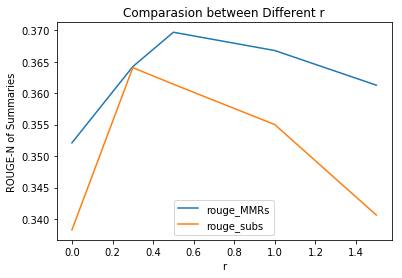

In [82]:
plt.title("Comparasion between Different r")
plt.ylabel("ROUGE-N of Summaries")
plt.xlabel("r")
plt.plot(rs, res_rs["rouge_MMRs"], label = "rouge_MMRs")
plt.plot(rs, res_rs["rouge_subs"], label = "rouge_subs")
plt.legend()
# plt.show()
plt.draw()
plt.savefig("different_rs", dpi = 300)

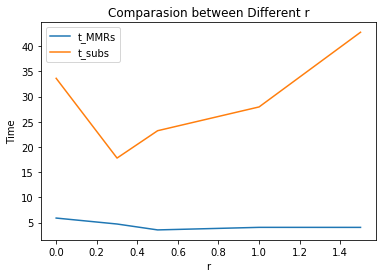

In [83]:
plt.title("Comparasion between Different r")
plt.ylabel("Time")
plt.xlabel("r")
plt.plot(rs, res_rs["t_MMRs"], label = "t_MMRs")
plt.plot(rs, res_rs["t_subs"], label = "t_subs")
plt.legend()
# plt.show()
plt.draw()
plt.savefig("time_different_rs", dpi = 300)

# Results when r = 0.3

In [3]:
res_r03 = pd.read_csv("results_Opinosis_r_0.3_lazy.csv", sep = ",")
res_r03

,Unnamed: 0,rouge_MMRs,rouge_MMR_lazys,rouge_MMR_doubles,S_MMR_double_cost,rouge_subs,rouge_sub_lazys,t_MMRs,t_MMR_lazy,t_MMR_doubles,t_subs,t_sub_lazy,nbr_sentences
0,0,0.370690,0.370690,0.698276,378.0,0.370690,0.370690,0.216415,0.098420,0.102982,0.722642,0.221288,64.0
1,1,0.330097,0.330097,0.669903,528.0,0.320388,0.320388,0.886324,0.294389,0.341121,2.700688,0.739300,111.0
2,2,0.451220,0.451220,0.731707,609.0,0.451220,0.451220,5.097246,0.431780,0.197826,17.435411,1.113868,88.0
3,3,0.408333,0.408333,0.750000,532.0,0.441667,0.441667,0.151526,0.092225,0.099990,7.491645,0.624625,66.0
4,4,0.311258,0.311258,0.748344,582.0,0.284768,0.284768,0.201403,0.119209,0.151115,1.154919,0.331286,80.0
5,5,0.382812,0.382812,0.679688,836.0,0.382812,0.382812,1.519390,0.205292,0.227354,0.854091,0.445889,95.0
6,6,0.405797,0.405797,0.768116,676.0,0.405797,0.405797,5.500066,0.387029,0.219890,18.570804,1.184179,88.0
7,7,0.279070,0.279070,0.686047,374.0,0.418605,0.418605,1.714715,0.214792,0.100122,0.739225,0.219454,60.0
8,8,0.333333,0.333333,0.710692,628.0,0.339623,0.339623,10.431278,0.583503,0.396187,22.872308,1.314306,121.0
9,9,0.272727,0.272727,0.727273,1194.0,0.324675,0.324675,41.964514,1.485064,1.238694,6.735511,2.257356,195.0


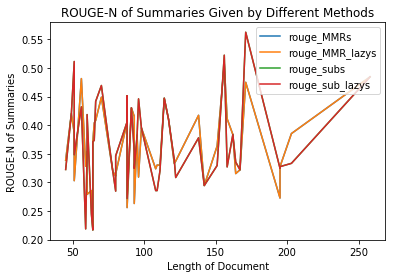

In [7]:
nbr_sent = np.array(res_r03["nbr_sentences"])
argsorted = np.argsort(nbr_sent)
nbr_sent_sorted = res_r03["nbr_sentences"][argsorted]
rouge_MMRs_sent = res_r03["rouge_MMRs"][argsorted]
rouge_MMR_lazys_sent = res_r03["rouge_MMR_lazys"][argsorted]
rouge_sub_lazys_sent = res_r03["rouge_sub_lazys"][argsorted]

rouge_subs_sent = res_r03["rouge_subs"][argsorted]

plt.title("ROUGE-N of Summaries Given by Different Methods")
plt.ylabel("ROUGE-N of Summaries")
plt.xlabel("Length of Document")
plt.plot(nbr_sent_sorted, rouge_MMRs_sent, label = "rouge_MMRs")
plt.plot(nbr_sent_sorted, rouge_MMR_lazys_sent, label = "rouge_MMR_lazys")
plt.plot(nbr_sent_sorted, rouge_subs_sent, label = "rouge_subs")
plt.plot(nbr_sent_sorted, rouge_sub_lazys_sent, label = "rouge_sub_lazys")
plt.legend()
# plt.show()
plt.draw()
plt.savefig("rouge_n_S", dpi = 300)

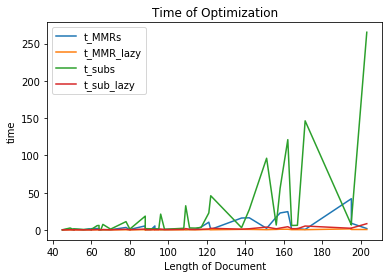

In [8]:


nbr_sent = np.array(res_r03["nbr_sentences"])
argsorted = np.argsort(nbr_sent)[:-1]
nbr_sent_sorted = res_r03["nbr_sentences"][argsorted]
rouge_MMRs_sent = res_r03["t_MMRs"][argsorted]
rouge_MMRs_lazy_sent = res_r03["t_MMR_lazy"][argsorted]
rouge_subs_lazy_sent = res_r03["t_sub_lazy"][argsorted]
rouge_subs_sent = res_r03["t_subs"][argsorted]

plt.title("Time of Optimization")
plt.xlabel("Length of Document")
plt.ylabel("time")
plt.plot(nbr_sent_sorted, rouge_MMRs_sent, label = "t_MMRs")
plt.plot(nbr_sent_sorted, rouge_MMRs_lazy_sent, label = "t_MMR_lazy")
plt.plot(nbr_sent_sorted, rouge_subs_sent, label = "t_subs")
plt.plot(nbr_sent_sorted, rouge_subs_lazy_sent, label = "t_sub_lazy")
plt.legend()
plt.show()

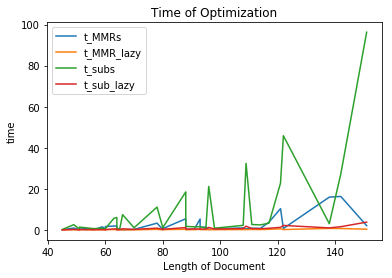

In [9]:

nbr_sent = np.array(res_r03["nbr_sentences"])
argsorted = np.argsort(nbr_sent)[:-10]
nbr_sent_sorted = np.array(res_r03["nbr_sentences"][argsorted])
rouge_MMRs_sent = np.array(res_r03["t_MMRs"][argsorted])
rouge_MMR_lazys_sent = np.array(res_r03["t_MMR_lazy"][argsorted])
rouge_subs_sent = np.array(res_r03["t_subs"][argsorted])
rouge_sub_lazys_sent = np.array(res_r03["t_sub_lazy"][argsorted])

plt.title("Time of Optimization")
plt.xlabel("Length of Document")
plt.ylabel("time")
plt.plot(nbr_sent_sorted, rouge_MMRs_sent, label = "t_MMRs")
plt.plot(nbr_sent_sorted, rouge_MMR_lazys_sent, label = "t_MMR_lazy")
plt.plot(nbr_sent_sorted, rouge_subs_sent, label = "t_subs")
plt.plot(nbr_sent_sorted, rouge_sub_lazys_sent, label = "t_sub_lazy")
plt.legend()
# plt.show()
plt.draw()
plt.savefig("Time_of_Optimization_no_smooth", dpi = 300)

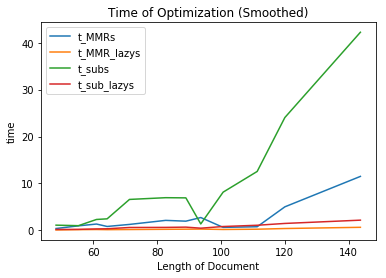

In [10]:
x = np.mean(nbr_sent_sorted.reshape(-1, 3), axis=1)
y1 = np.mean(rouge_MMRs_sent.reshape(-1, 3), axis=1)
y2 = np.mean(rouge_MMR_lazys_sent.reshape(-1, 3), axis=1)
y3 = np.mean(rouge_subs_sent.reshape(-1, 3), axis=1)
y4 = np.mean(rouge_sub_lazys_sent.reshape(-1, 3), axis=1)

plt.title("Time of Optimization (Smoothed)")
plt.xlabel("Length of Document")
plt.ylabel("time")
plt.plot(x, y1, label = "t_MMRs")
plt.plot(x, y2, label = "t_MMR_lazys")
plt.plot(x, y3, label = "t_subs")
plt.plot(x, y4, label = "t_sub_lazys")
plt.legend()
# plt.show()
plt.draw()
plt.savefig("Time_of_Optimization", dpi = 300)

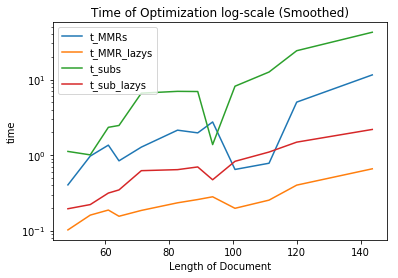

In [11]:
x = np.mean(nbr_sent_sorted.reshape(-1, 3), axis=1)
y1 = np.mean(rouge_MMRs_sent.reshape(-1, 3), axis=1)
y2 = np.mean(rouge_MMR_lazys_sent.reshape(-1, 3), axis=1)
y3 = np.mean(rouge_subs_sent.reshape(-1, 3), axis=1)
y4 = np.mean(rouge_sub_lazys_sent.reshape(-1, 3), axis=1)

plt.title("Time of Optimization log-scale (Smoothed)")
plt.xlabel("Length of Document")
plt.ylabel("time")
plt.yscale('log')
plt.plot(x, y1, label = "t_MMRs")
plt.plot(x, y2, label = "t_MMR_lazys")
plt.plot(x, y3, label = "t_subs")
plt.plot(x, y4, label = "t_sub_lazys")
plt.legend()
plt.draw()
# plt.show()
plt.savefig("Time_of_Optimization_log", dpi = 300)

# Compare obj f_MMR and f_sub Computation cost

In [12]:
def compare_f_MMR_sub(topics_file_name, N = 10):

    sub_model = SubmodModel(topics_file_name)
    all_sent = list(range(sub_model.X_train_tf.shape[0]))
    t_start = time.time()
    for i in range(N):
        S = np.unique(np.random.choice(all_sent, 5))
        S = S.tolist()
        sub_model.get_f_sub(S)
    t1 = time.time() - t_start

    t_start = time.time()
    for i in range(N):
        S = np.unique(np.random.choice(all_sent, 5))
        S = S.tolist()
        sub_model.get_f_MMR(S)
    t2 = time.time() - t_start
    
    return t1, t2, len(all_sent)

In [13]:
topics_file_name = topics_file_names[0]
compare_f_MMR_sub(topics_file_name)

(0.015819787979125977, 0.003548145294189453, 64)

In [14]:
t_f_sub = []
t_f_MMR = []
nbr_sent = []
for topics_file_name in topics_file_names:
    res = compare_f_MMR_sub(topics_file_name)
    t_f_sub.append(res[0])
    t_f_MMR.append(res[1])
    nbr_sent.append(res[2])

In [77]:
index = np.argsort(nbr_sent)
nbr_sent = np.array(nbr_sent)[index]
t_f_sub = np.array(t_f_sub)[index]
t_f_MMR = np.array(t_f_MMR)[index]

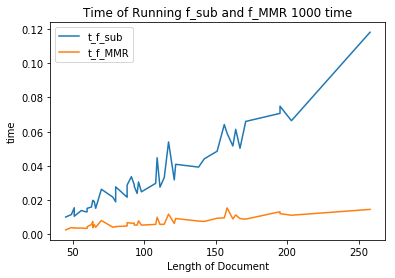

In [78]:
plt.figure()
plt.title("Time of Running f_sub and f_MMR 1000 time")
plt.xlabel("Length of Document")
plt.ylabel("time")
plt.plot(nbr_sent, t_f_sub, label = "t_f_sub")
plt.plot(nbr_sent, t_f_MMR, label = "t_f_MMR")
plt.legend()
# plt.show()
plt.draw()
plt.savefig("Time_f_sub_and_MMR", dpi = 300)

# Double greedy without budget

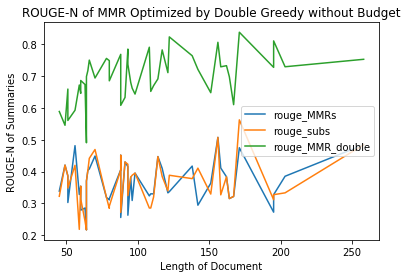

In [13]:
nbr_sent = np.array(res_r03["nbr_sentences"])
argsorted = np.argsort(nbr_sent)
nbr_sent_sorted = res_r03["nbr_sentences"][argsorted]
rouge_MMRs_sent = res_r03["rouge_MMRs"][argsorted]
rouge_MMR_doubles_sent = res_r03["rouge_MMR_doubles"][argsorted]

cost_sent = res_r03["S_MMR_double_cost"][argsorted]

rouge_subs_sent = res_r03["rouge_subs"][argsorted]

plt.title("ROUGE-N of MMR Optimized by Double Greedy without Budget")
plt.ylabel("ROUGE-N of Summaries")
plt.xlabel("Length of Document")
plt.plot(nbr_sent_sorted, rouge_MMRs_sent, label = "rouge_MMRs")
plt.plot(nbr_sent_sorted, rouge_subs_sent, label = "rouge_subs")
plt.plot(nbr_sent_sorted, rouge_MMR_doubles_sent, label = "rouge_MMR_double")
plt.legend()
# plt.show()
plt.draw()
plt.savefig("rouge_n_S_double", dpi = 300)

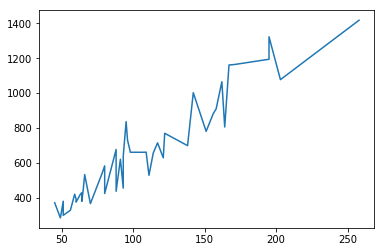

In [9]:
plt.plot(nbr_sent_sorted, cost_sent, label = "double_cost")

In [14]:
np.mean(cost_sent)

667.4347826086956

# Graduation Summary

In [39]:
topics_file_name = "graduation.txt"
sub_model = SubmodModel(topics_file_name, True)

In [40]:
text = open(topics_file_name, encoding="utf8", errors='ignore')
text = text.read()
trainer = PunktTrainer()
trainer.INCLUDE_ALL_COLLOCS = True
trainer.train(text)
tokenizer = PunktSentenceTokenizer(trainer.get_params())
X = tokenizer.tokenize(text)
X = np.array(X)

In [41]:
sub_sum = sub_model.greedy_submodular(sub_model.get_f_sub, sub_model.get_cost, budget=30, r=0.3, lazy=True)
MMR_sum = sub_model.greedy_submodular(sub_model.get_f_MMR, sub_model.get_cost, budget=30, r=0.3, lazy=True)

/Users/chenjipeng/Documents/Learn/Columbia/IEOR4008/Proj/focus/coding/Submod.py:203: RuntimeWarning: invalid value encountered in double_scalars
  Delta = [fun([u])/ (cost_fun([u])) ** r for u in U]
/Users/chenjipeng/Documents/Learn/Columbia/IEOR4008/Proj/focus/coding/Submod.py:208: RuntimeWarning: invalid value encountered in double_scalars
  delta = (fun(G + [U[max_index]]) - fun(G))/ cost_fun([U[max_index]]) ** r


In [42]:
X[MMR_sum]

array(['.', '.', '.', 'But you will.', 'You’ll find a way.',
       'Be yourself, and be true to yourself.', 'To share.'],
      dtype='<U292')

In [43]:
X[sub_sum]

array(['.', '.', '.', 'But you will.', 'You’ll find a way.',
       'It will be your life.', 'To share.', 'Observe it.'], dtype='<U292')